In [1]:
#!pip install wordcloud
#!pip install textblob

In [2]:
from PIL import Image
import os
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt 
import matplotlib

%matplotlib inline

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings('ignore')

In [3]:
# tweets with topic labels
topic_modeled = pd.read_csv('../output/tweets_with_topic_label.csv')

# sentiment data from Olha's branch
sentiment_analysis_clean = pd.read_csv('C:/Users/Chloe/Downloads/sentiment_analysis_clean.csv')
sentiment_labels = pd.read_csv('../output/sentiment_labels.csv')

# most frequent words in topics
topic_tops = pd.read_csv('../output/topic top words v2.csv')

In [4]:
topic_modeled['idx'] = topic_modeled.index
sentiment_labels.rename(columns={'Unnamed: 0':'idx'}, inplace=True)

In [5]:
topic_modeled = pd.merge(sentiment_labels,topic_modeled.drop(['id','text'], axis = 1),on='idx')

In [6]:
# Check if they are retweets: there are retweets in the middle of the text
tweets = topic_modeled['text'].to_list()
values = []

for tweet in tweets:
    if tweet.find('RT @') == -1:
        value = False
    else:
        value = True
    values.append(value)

topic_modeled['RT'] = values

In [7]:
print(len(sentiment_analysis_clean))
print(len(topic_modeled))
print(len(topic_modeled[topic_modeled.RT==False])) #if contains "RT @"
print(len(sentiment_analysis_clean[sentiment_analysis_clean.isRetweet=='f']))
print(len(sentiment_analysis_clean[sentiment_analysis_clean.retweeted==False])) #if startswith "RT"

56571
52608
43493
46694
46869


In [8]:
# Extract time from date
topic_modeled['date'] = topic_modeled.date.astype('datetime64[ns]')
#topic_modeled['year'] = topic_modeled.date.dt.year
#topic_modeled['day'] = topic_modeled.date.dt.date
#topic_modeled['month'] = topic_modeled.date.dt.month
topic_modeled['time'] = topic_modeled.date.dt.time
topic_modeled['hour'] = pd.to_numeric(topic_modeled.date.dt.hour)

In [9]:
[print(str(i),'\n',Counter(topic_modeled[i]),'\n','-'*30) for i in ['device','isDeleted','RT','Topic','hour','Final']]

device 
 Counter({'Twitter for iPhone': 24422, 'Twitter for Android': 14388, 'Twitter Web Client': 12086, 'TweetDeck': 481, 'TwitLonger Beta': 402, 'Twitter Media Studio': 244, 'Instagram': 126, 'Facebook': 103, 'Twitter for BlackBerry': 97, 'Twitter Ads': 95, 'Twitter Web App': 60, 'Twitter for iPad': 56, 'Twitlonger': 23, 'Vine - Make a Scene': 9, 'Periscope': 7, 'Neatly For BlackBerry 10': 5, 'Media Studio': 2, 'Twitter for Websites': 1, 'Twitter Mirror for iPad': 1}) 
 ------------------------------
isDeleted 
 Counter({'f': 51659, 't': 949}) 
 ------------------------------
RT 
 Counter({False: 43493, True: 9115}) 
 ------------------------------
Topic 
 Counter({3: 7108, 9: 6890, 0: 6010, 4: 5819, 6: 5325, 2: 4763, 5: 4640, 1: 4633, 7: 3769, 8: 3651}) 
 ------------------------------
hour 
 Counter({12: 3582, 20: 3500, 19: 3313, 13: 3224, 11: 2980, 14: 2954, 18: 2833, 15: 2742, 21: 2736, 2: 2681, 1: 2474, 16: 2445, 3: 2375, 22: 2220, 0: 2158, 17: 2156, 23: 2052, 4: 1765, 10: 1554

[None, None, None, None, None, None]

In [10]:
topic_modeled

,idx,text,sentiment_text,subjectivity_score,VADER,TextBlob,W2V-kNN,Final,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged,Topic,RT,time,hour
0,0,Republicans and Democrats have both created ou...,republicans democrats created economic problems,0.200000,-1,1,-1,-1,f,f,TweetDeck,49,255,2011-08-02 18:07:48,f,0,False,18:07:48,18
1,1,I was thrilled to be back in the Great city of...,thrilled_back great city charlotte north_carol...,0.483333,1,1,-1,1,f,f,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,f,6,False,01:34:50,1
2,2,RT @CBS_Herridge: READ: Letter to surveillance...,read letter surveillance court obtained cbs ne...,0.100000,0,1,-1,0,t,f,Twitter for iPhone,0,7396,2020-01-17 03:22:47,f,6,True,03:22:47,3
3,3,The Unsolicited Mail In Ballot Scam is a major...,unsolicited mail_ballot scam major threat demo...,0.454762,-1,1,-1,-1,f,f,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,f,5,False,20:10:58,20
4,4,RT @MZHemingway: Very friendly telling of even...,friendly telling events comey apparent leaking...,0.425000,1,1,1,1,t,f,Twitter for iPhone,0,9081,2020-01-17 13:13:59,f,9,True,13:13:59,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52603,54677,RT @callme_Chari: @newscomauHQ If he’s anythin...,’ anything like trump congratulations leader l...,0.000000,1,0,-1,0,t,f,Twitter for iPhone,0,2927,2019-05-18 21:00:20,f,6,True,21:00:20,21
52604,54678,Congratulations to Scott on a GREAT WIN! https...,congratulations scott great win,0.575000,1,1,1,1,f,f,Twitter for iPhone,55131,11251,2019-05-18 20:59:13,f,1,False,20:59:13,20
52605,54679,Our courageous and vigilant Armed Forces safeg...,courageous vigilant armed_forces safeguard ble...,0.562500,1,1,-1,1,f,f,Twitter for iPhone,70651,16407,2019-05-18 15:55:17,f,3,False,15:55:17,15
52606,54680,Consumer Sentiment in the month of May is the ...,consumer sentiment month may highest years nice,1.000000,1,1,-1,1,f,f,Twitter for iPhone,76333,14617,2019-05-17 22:49:34,f,7,False,22:49:34,22


In [11]:
# save 
topic_modeled.to_csv(r'../output/data_for_analysis.csv', index=False)

## 30 most frequent words in topics

In [12]:
# frequency ascending
for i in range(len(topic_tops)):
    print(topic_tops.iloc[i,1])
    print('-'*50)

[['wait', 'teamtrump', 'service', 'building', 'press', 'million', 'war', 'energy', 'truly', 'dont', 'lot', 'candidate', 'remember', 'open', 'presidential', 'end', 'problem', 'live', 'place', 'soon', 'doesnt', 'white', 'nation', 'whitehouse', 'sta', 'people', 'better', 'watch', 'look', 'house']]
--------------------------------------------------
[['absolutely', 'highest', 'given', 'robe', 'mark', 'miss', 'save', 'celebrity', 'win', 'russian', 'apprenticenbc', 'god', 'wow', 'ivankatrump', 'happen', 'stand', 'celebapprentice', 'apprentice', 'justice', 'case', 'senator', 'cou', 'witch', 'hunt', 'rating', 'book', 'congratulation', 'tonight', 'best', 'great']]
--------------------------------------------------
[['failing', 'success', 'texas', 'going', 'price', 'south', 'truth', 'cruz', 'tariff', 'drug', 'korea', 'federal', 'company', 'lie', 'schiff', 'lost', 'happy', 'york', 'hit', 'fantastic', 'iran', 'time', 'course', 'wall', 'border', 'fbi', 'security', 'story', 'record', 'national']]
---

In [13]:
topic_labels = ['Whitehouse','Apprentice Show','National security','Election','MAGA',
                'Fake news','Hillary & Obama','President Trump','Interviews','China']

In [14]:
# 'realdonaldtrump' is occurs very frequently in topics
# so check if texts contain 'realdonaldtrump'
tweets = topic_modeled['text'].to_list()
values = []

for tweet in tweets:
    if tweet.find('realdonaldtrump') == -1:
        value = False
    else:
        value = True
    values.append(value)

topic_modeled['realdonaldtrump']= values

In [15]:
print(len(topic_modeled[(topic_modeled.realdonaldtrump==True)]))
print(len(topic_modeled[(topic_modeled.realdonaldtrump==True) & (topic_modeled.RT==False)].text))

119
81


## Heatmap: Tweet topic vs. device

In [16]:
# Reference: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    inputs
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.

    """
    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right",
             rotation_mode="anchor")

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    for i in range(len(row_labels)):
        for j in range(len(col_labels)):
            if a[i,j] == np.max(a, axis=1)[i]:
                text = ax.text(j, i, a[i, j],fontsize=15, 
                           ha="center", va="center", color="orange", weight="bold")
            else:
                text = ax.text(j, i, a[i, j],fontsize=13,
                           ha="center", va="center", color="black",alpha=0.8)

    return im, cbar

In [17]:
# (target) topic variable
topic_val = list(sorted(Counter(topic_modeled.Topic).keys()))

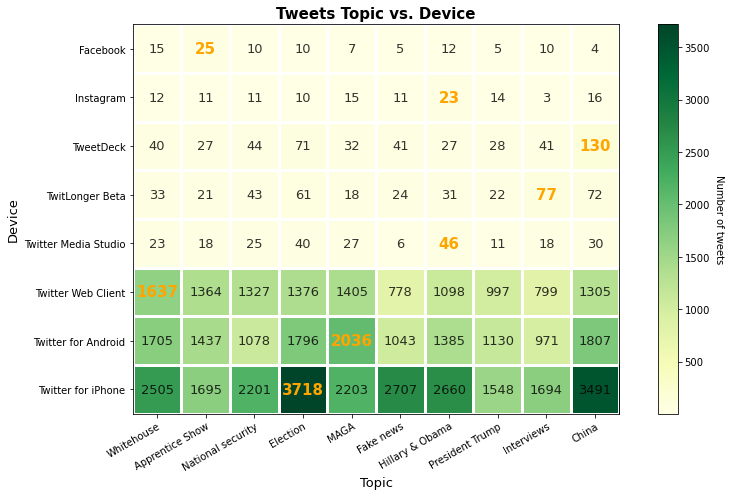

In [18]:
# device variable
device_val= list(sorted(Counter(topic_modeled.device).keys()))

counts=[]
for i in device_val:
    counts.append([i, sum(Counter(topic_modeled[topic_modeled.device==i]["Topic"]).values())])
df = pd.DataFrame(counts, columns=['device','counts'])#.sort_values(by='counts',ascending=False)[:10]
# Filters devices with 100+ tweets 
device_val=list(df[df.counts > 100].device)

# heatmap matrix

a = np.empty((0,len(topic_labels)),int)
for i in device_val:
    counter = Counter(topic_modeled[topic_modeled.device==i]["Topic"])
    row = np.array([dict(counter).get(key, 0) for key in topic_val]).reshape(-1,10)
    #row = np.array(list(dict(sorted(counter.items())).values())).reshape(-1,10)
    a= np.append(a, row, axis=0)

fig, ax = plt.subplots(figsize=(12,7))

im, cbar = heatmap(a, device_val, topic_labels, ax=ax,
                   cmap="YlGn", cbarlabel="Number of tweets")

ax.set_title("Tweets Topic vs. Device", fontsize=15, fontweight='bold')
ax.set_xlabel("Topic", fontsize=13)
ax.set_ylabel("Device", fontsize=13)
fig.tight_layout()
plt.show()

## Heatmap: Topics of Deleted/Undeleted Tweets

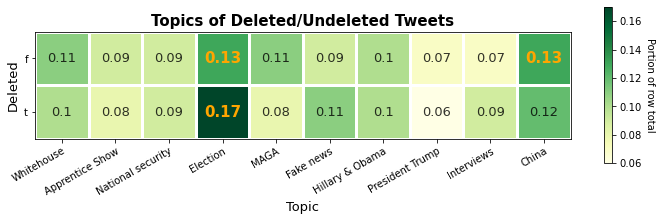

In [19]:
isdelete_val= list(sorted(Counter(topic_modeled.isDeleted).keys()))
# heatmap matrix

a = np.empty((0,len(topic_val)),int)
for i in isdelete_val:
    counter = Counter(topic_modeled[topic_modeled.isDeleted==i]["Topic"])
    row = np.array([dict(counter).get(key, 0) for key in topic_val]).reshape(-1,10)
    row = np.round(row/np.sum(row), decimals=2)
    #row = np.array(list(dict(sorted(counter.items())).values())).reshape(-1,10)
    a= np.append(a, row, axis=0)

fig, ax = plt.subplots(figsize=(10,3))

im, cbar = heatmap(a, isdelete_val, topic_labels, ax=ax,
                   cmap="YlGn", cbarlabel="Portion of row total")

ax.set_title("Topics of Deleted/Undeleted Tweets", fontsize=15, fontweight='bold')
ax.set_xlabel("Topic", fontsize=13)
ax.set_ylabel("Deleted", fontsize=13)
fig.tight_layout()
plt.show()

## Heatmap: Tweets Topic vs. Sentiment

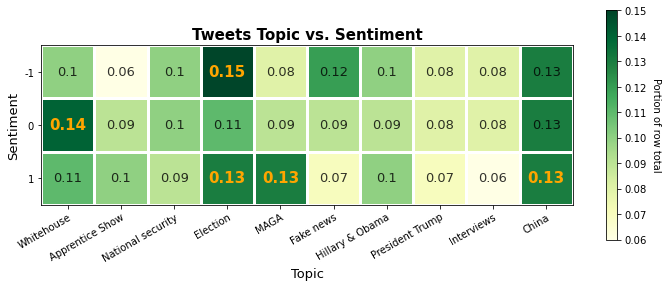

In [20]:
final_val= list(sorted(Counter(topic_modeled.Final).keys()))
# heatmap matrix

a = np.empty((0,len(topic_val)),int)
for i in final_val:
    counter = Counter(topic_modeled[topic_modeled.Final==i]["Topic"])
    row = np.array([dict(counter).get(key, 0) for key in topic_val]).reshape(-1,10)
    row = np.round(row/np.sum(row), decimals=2)
    #row = np.array(list(dict(sorted(counter.items())).values())).reshape(-1,10)
    a= np.append(a, row, axis=0)

fig, ax = plt.subplots(figsize=(10,4))

im, cbar = heatmap(a, final_val, topic_labels, ax=ax,
                   cmap="YlGn", cbarlabel="Portion of row total")

ax.set_title("Tweets Topic vs. Sentiment", fontsize=15, fontweight='bold')
ax.set_xlabel("Topic", fontsize=13)
ax.set_ylabel("Sentiment", fontsize=13)
fig.tight_layout()
plt.show()

## Heatmap: Tweets Sentiment vs. Device

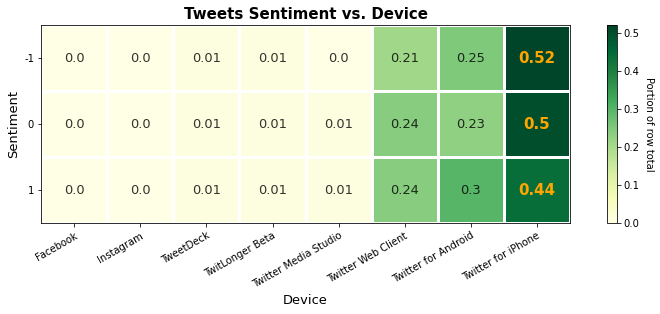

In [21]:
final_val= list(sorted(Counter(topic_modeled.Final).keys()))
# heatmap matrix

a = np.empty((0,len(device_val)),int)
for i in final_val:
    counter = Counter(topic_modeled[topic_modeled.Final==i]["device"])
    row = np.array([dict(counter).get(key, 0) for key in device_val]).reshape(-1,8)
    row = np.round(row/np.sum(row), decimals=2)
    #row = np.array(list(dict(sorted(counter.items())).values())).reshape(-1,10)
    a= np.append(a, row, axis=0)

fig, ax = plt.subplots(figsize=(11,4))

im, cbar = heatmap(a, final_val, device_val, ax=ax,
                   cmap="YlGn", cbarlabel="Portion of row total")


ax.set_title("Tweets Sentiment vs. Device", fontsize=15, fontweight='bold')
ax.set_xlabel("Device", fontsize=13)
ax.set_ylabel("Sentiment", fontsize=13)
fig.tight_layout()
plt.show()

## WordCloud for each topic

In [22]:
delete = topic_modeled[topic_modeled.isDeleted=='t'].sentiment_text
len(delete)

949

In [23]:
import cv2
path = os.path.dirname(os.getcwd())
path = os.path.join(path, "figs\\")

# create image mask
img_grey = cv2.imread('../figs/trump.png', cv2.IMREAD_GRAYSCALE)
thresh = 240
# threshold the image
img_binary = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)[1]
#save image
cv2.imwrite(os.path.join(path, "trump_mask.png"),img_binary) 

True

In [24]:
trump_mask = np.array(Image.open(os.path.join(path, "trump_mask.png")))
trump = np.array(Image.open(os.path.join(path, "trump.png")))
image_colors = ImageColorGenerator(trump)

In [25]:
stopwords = set(STOPWORDS)
overused = ['thank','thanks','new','big','nice','like','time','year','years','know','think','thought',
            'want','good','little','never','wants','want','thing','follow','followed','go','going','way','love',
            'see','saw','high','low','say','says','day','today','different','realdonaldtrump','amp','true','really']
for i in overused:
    stopwords.add(i)

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def plot_wordcloud(topic=0, topic_label=''):
    freq_dict = dict(get_top_n_words(topic_modeled[topic_modeled.Topic==topic].sentiment_text))
    for i in stopwords:
        if i in freq_dict:
            freq_dict.pop(i)
    wordcloud = WordCloud(font_path='../data/Candara.ttf',
                        background_color='white',
                        max_words=100,
                        max_font_size=100, 
                        mask=trump_mask,
                        random_state=42).generate_from_frequencies(freq_dict)
    fig = plt.figure(figsize=(8,8))
    #plt.imshow(wordcloud)
    plt.imshow(wordcloud.recolor(color_func=image_colors))#, interpolation="bilinear")
    plt.axis('off')
    plt.title('Topic {}: {}'.format(topic,topic_label), fontsize=15, fontweight='bold')
    plt.show()

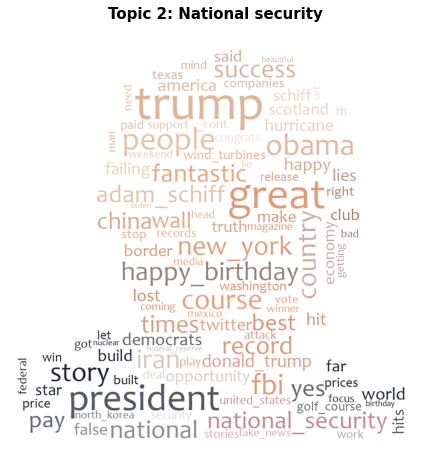

In [27]:
plot_wordcloud(topic=2, topic_label=topic_labels[2])

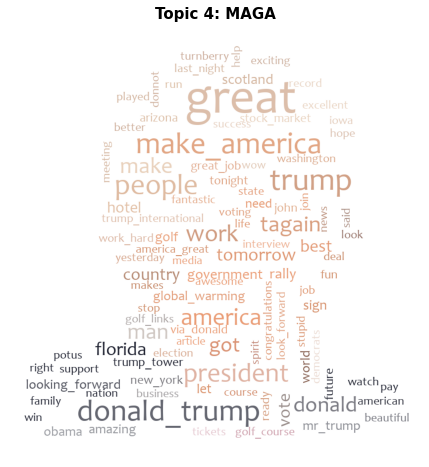

In [28]:
plot_wordcloud(topic=4, topic_label=topic_labels[4])

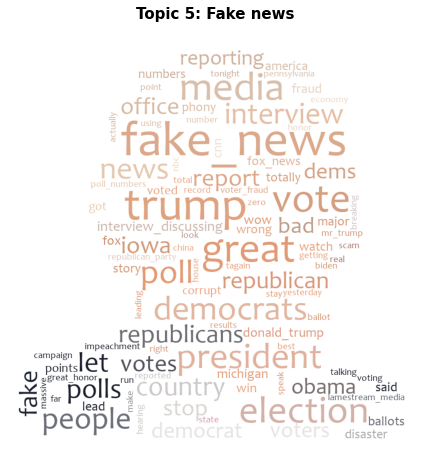

In [29]:
plot_wordcloud(topic=5, topic_label=topic_labels[5])

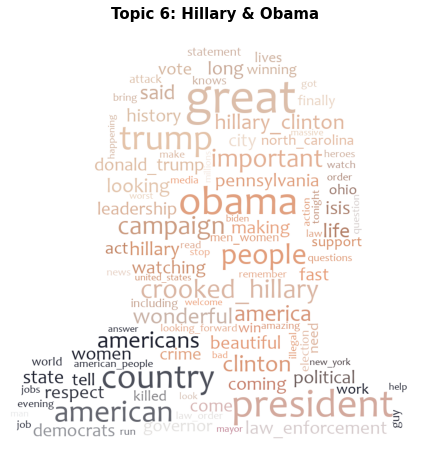

In [30]:
plot_wordcloud(topic=6, topic_label=topic_labels[6])

## Effects of topics

In [31]:
avg_retweets = topic_modeled.groupby('Topic')['retweets'].agg(np.mean)
avg_favorites = topic_modeled.groupby('Topic')['favorites'].agg(np.mean)
#ratio = avg_retweets/avg_favorites

#df = np.array([topic_labels, list(avg_retweets), list(avg_favorites), list(ratio)])
#topic_summary = pd.DataFrame(df.T, columns=['topic','avg_retweets','avg_favorites','retweets_favorites_ratio'])

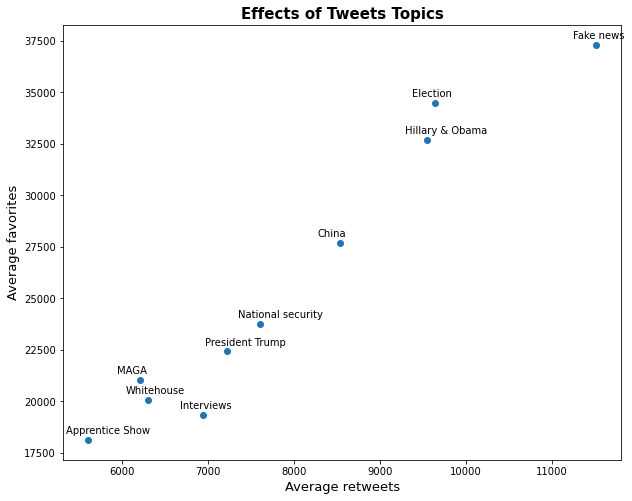

In [36]:
plt.figure(figsize=(10,8))
plt.scatter(avg_retweets, avg_favorites)
for i, txt in enumerate(topic_labels):
    plt.annotate(txt, (avg_retweets[i]-260, avg_favorites[i]+300))
plt.xlabel('Average retweets', fontsize=13)
plt.ylabel('Average favorites', fontsize=13)
plt.title('Effects of Tweets Topics', fontsize=15, fontweight='bold')
plt.show()

**Tweets of the fake news topic has the highest average retweets and favorites; the Apprentice show tweets were published in earlier years before Trump was elected, thus the relevant tweets had the lowest effects**

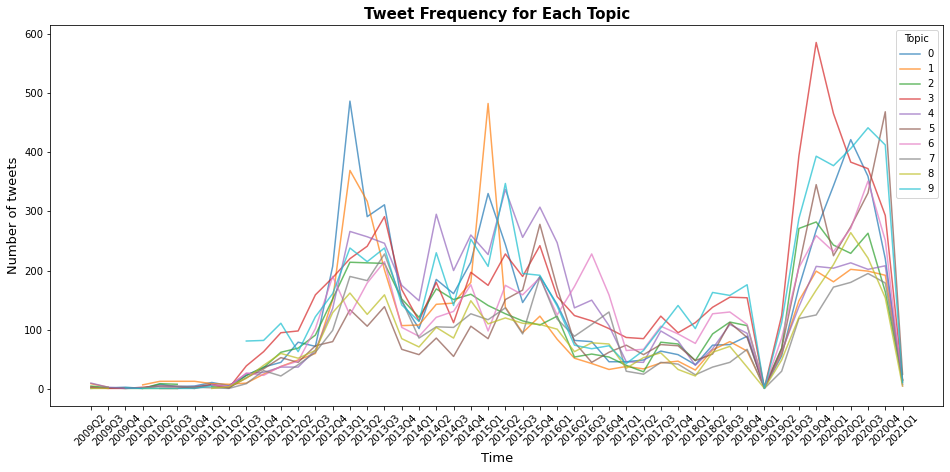

In [37]:
topic_modeled['yr-qt'] = topic_modeled.date.dt.year.astype(str) + 'Q' +topic_modeled.date.dt.quarter.astype(str)
topic_modeled['yr-m'] = topic_modeled.date.dt.year.astype(str) + '-' +topic_modeled.date.dt.month.astype(str)
# plot data
fig, ax = plt.subplots(figsize=(16,7))
# use unstack()
topic_modeled.groupby(['yr-qt','Topic'])['idx'].count().unstack().plot(ax=ax,alpha=0.7)#ls=('dashed'),
plt.xlabel('Time', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.title('Tweet Frequency for Each Topic', fontsize=15, fontweight='bold')
plt.xticks(np.arange(topic_modeled['yr-qt'].nunique()), np.sort(topic_modeled['yr-qt'].unique()), rotation=45)
plt.show()

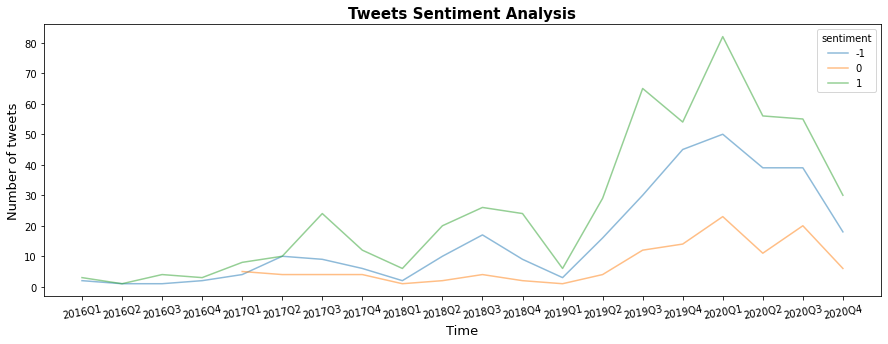

In [38]:
# plot data
fig, ax = plt.subplots(figsize=(15,5))
# use unstack()

data = topic_modeled[topic_modeled.isDeleted=='t']
data['sentiment'] = data.Final
(data.groupby(['yr-qt','sentiment'])['idx'].count().unstack().plot(ax=ax,alpha=0.5))
plt.xlabel('Time', fontsize=13)
plt.ylabel('Number of tweets', fontsize=13)
plt.title('Tweets Sentiment Analysis', fontsize=15, fontweight='bold')
plt.xticks(np.arange(data['yr-qt'].nunique()), np.sort(data['yr-qt'].unique()), rotation=10)
plt.show()

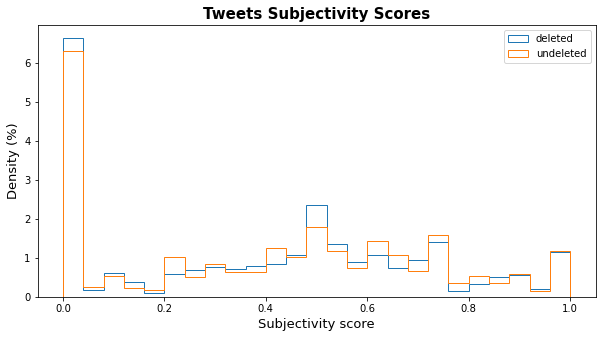

In [39]:
# No noticeable trend
deleted = topic_modeled[topic_modeled.isDeleted=='t']
undeleted = topic_modeled[topic_modeled.isDeleted=='f']
fig, ax = plt.subplots(figsize=(10,5))
plt.hist(deleted['subjectivity_score'], 25, histtype='step', stacked=True, fill=False,density = True, label='deleted')
plt.hist(undeleted['subjectivity_score'], 25, histtype='step', stacked=True, fill=False,density = True, label='undeleted')
plt.xlabel('Subjectivity score', fontsize=13)
plt.ylabel('Density (%)', fontsize=13)
plt.title('Tweets Subjectivity Scores', fontsize=15, fontweight='bold')
plt.legend()
plt.show()